In [16]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers
pio.renderers.default = "notebook_connected"
import plotly.express as px
import statsmodels.formula.api as smf

# Carregando os dados
data = pd.read_csv('1. Dados/base.csv')

Objetivo 1, interpretabilidade: construir uma regressão linear simples, com poucas variáveis importantes, visando gerar insights para corretores e proprietários no quesito precificação dos imóveis. Ou seja, o foco será na interpretação dos coeficientes (ex: se aumentar a área do imóvel em uma unidade isso irá aumentar em Y o preço deste imóvel).

Roteiro para o desafio:

 Análise exploratória

In [17]:
data.head()

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,...,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- Verificar a distribuição da variável de interesse (valor de venda)

In [18]:
sns.set(font_scale = 1.3) # Para aumentar o tamanho da fonte
coluna = "PrecoVenda" # Coluna a ser representada

fig = px.histogram(data, x=coluna)
fig.show()

- Contar o número de valores faltantes

In [19]:
columns_nan = data.columns[data.isna().any()].tolist()
data[columns_nan].isna().sum()

Fachada                259
Beco                  1369
TipoAlvenaria            8
AreaAlvenaria            8
AlturaPorao             37
CondicaoPorao           37
ParedePorao             38
TipoAcabPorao1          37
TipoAcabPorao2          38
InstalacaoEletrica       1
QualdiadeLareira       690
LocalGaragem            81
AnoGaragem              81
AcabamentoGaragem       81
QualidadeGaragem        81
CondicaoGaragem         81
QualidadePiscina      1453
QualidadeCerca        1179
Outros                1406
dtype: int64

- Verificar a matriz de correlação entre as features continuas

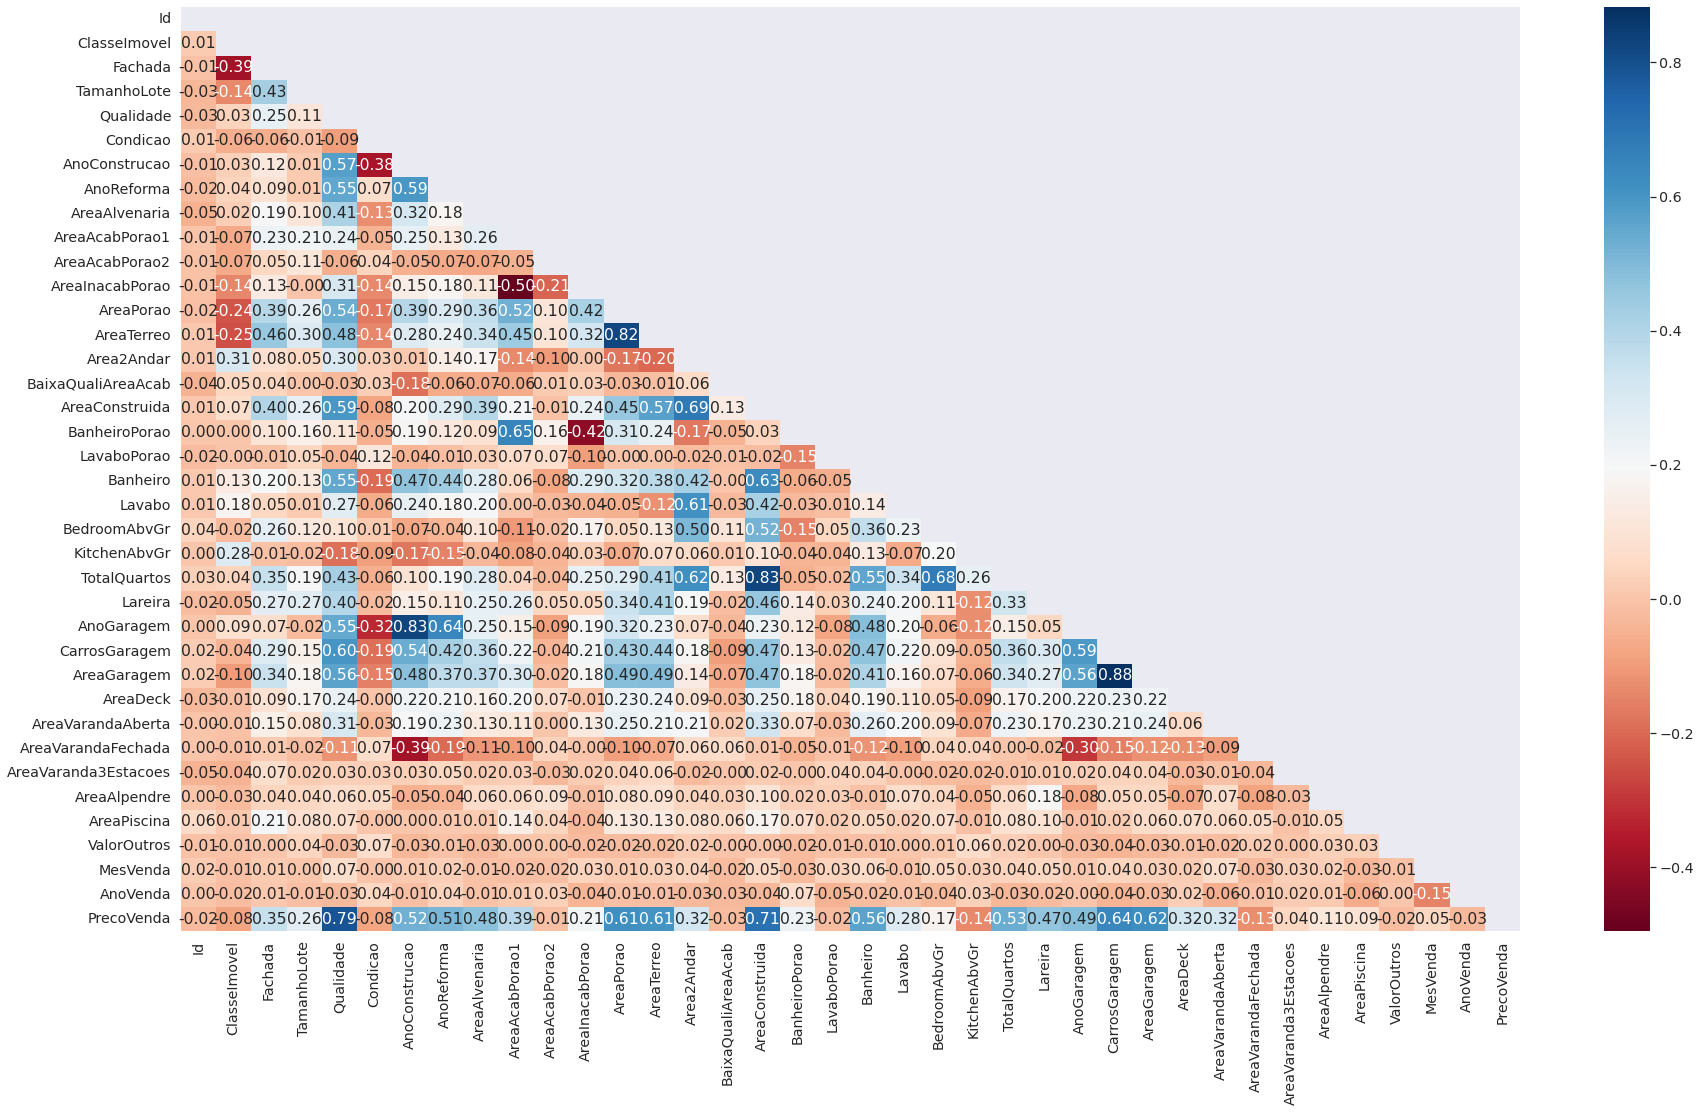

In [20]:
sns.set_context(font_scale=0.05)
plt.figure(figsize=(30,17))
sns.heatmap(
    data.corr(), #Fonte dos dados, nossa matriz de correlação
    annot=True, #Anotar os valores das correlações nas caixinhas coloridas
    fmt='.2f', # Formato float de 2 dígitos, para arredondar os números
    cmap='RdBu', # Mapa de cores do vermelho (menor) para o azul (maior)
    mask=np.triu( # Faz uma matriz triangular
        np.ones_like(data.corr()) # usando como base uma matriz de '1's, do mesmo tamanho que a matriz de correlação
    ) # A máscara vai então 'apagar' a diagonal superior da matriz
           )
plt.show()

In [21]:
colunas_numericas = [['Fachada','TamanhoLote','Qualidade','Condicao'],
                    ['AnoConstrucao','AnoReforma','AreaAlvenaria','AreaAcabPorao1'],
                    ['AreaAcabPorao2','AreaInacabPorao','AreaPorao','AreaTerreo'],
                    ['Area2Andar','BaixaQualiAreaAcab','AreaConstruida','BanheiroPorao'],
                    ['LavaboPorao','Banheiro','Lavabo','BedroomAbvGr'],
                    ['KitchenAbvGr','TotalQuartos','Lareira','AnoGaragem'],
                    ['CarrosGaragem','AreaGaragem','AreaDeck','AreaVarandaAberta'],
                    ['AreaVarandaFechada','AreaVaranda3Estacoes','AreaAlpendre','AreaPiscina'],
                    ['ValorOutros','MesVenda','AnoVenda','PrecoVenda']]

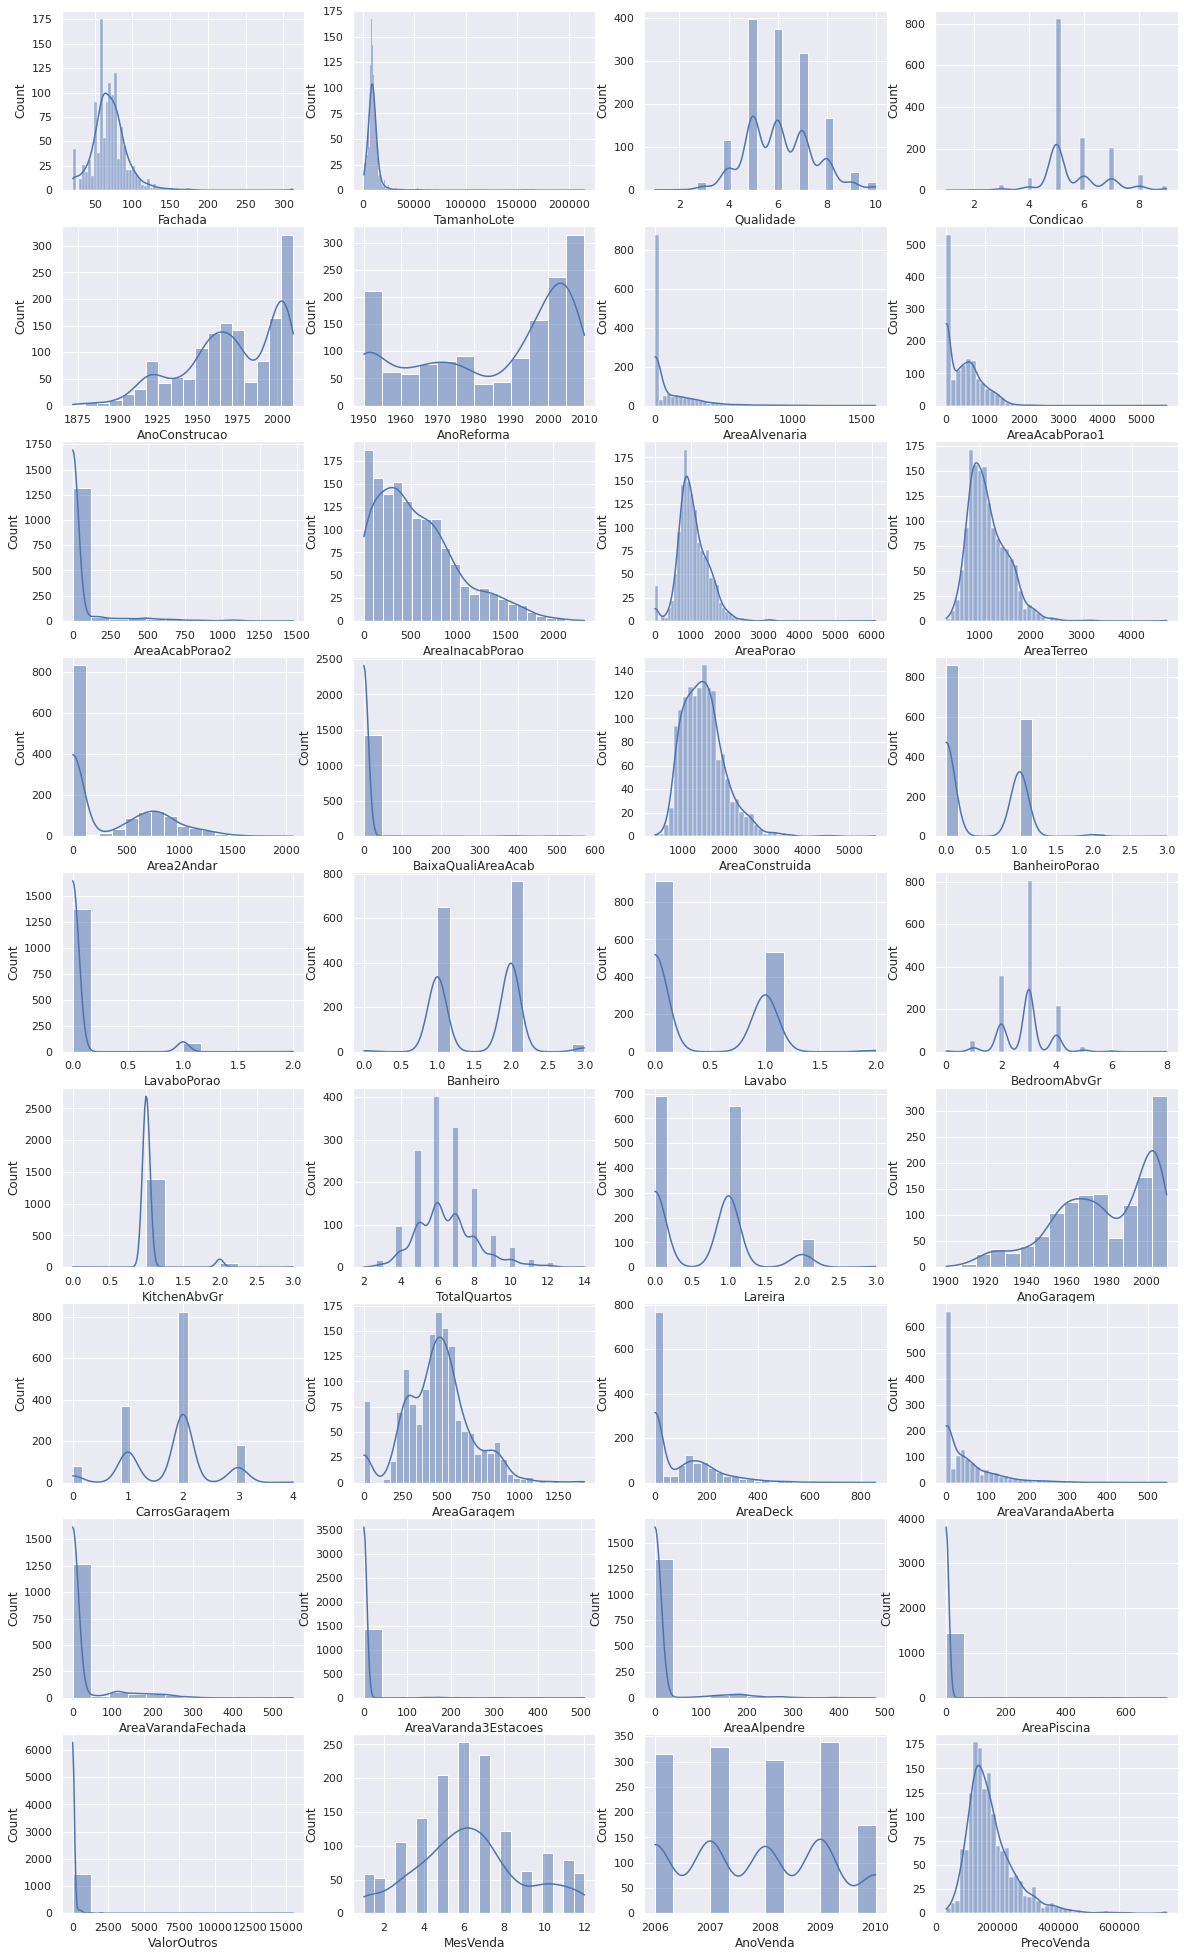

In [26]:
sns.set(font_scale=1)

fig, eixo = plt.subplots(9,4,figsize=(20,35)) 

# Para cada linha 
for i in range(9):
    # Para cada coluna
    for j in range(4):
        # Verifica se existe um nome de coluna na lista 'colunas_categoricas'
        if colunas_numericas[i][j] != '':
            # Se sim faz o plot do Boxplot naquela linha e coluna, indicando no eixo vertical/y sempre a variável 'PrecoVenda'
            sns.histplot(data=data, x=colunas_numericas[i][j], kde=True, ax=eixo[i][j])

In [64]:
colunas_continuas = [['Fachada','TamanhoLote','AreaAlvenaria','AreaAcabPorao1'],
                    ['AreaAcabPorao2','AreaInacabPorao','AreaPorao','AreaTerreo'],
                    ['Area2Andar','AreaConstruida','AreaGaragem','AreaDeck'],
                    ['AreaVarandaAberta','AreaVarandaFechada','AreaVaranda3Estacoes','AreaAlpendre'],
                    ['AreaPiscina','PrecoVenda','PrecoVenda','PrecoVenda']
                    ]

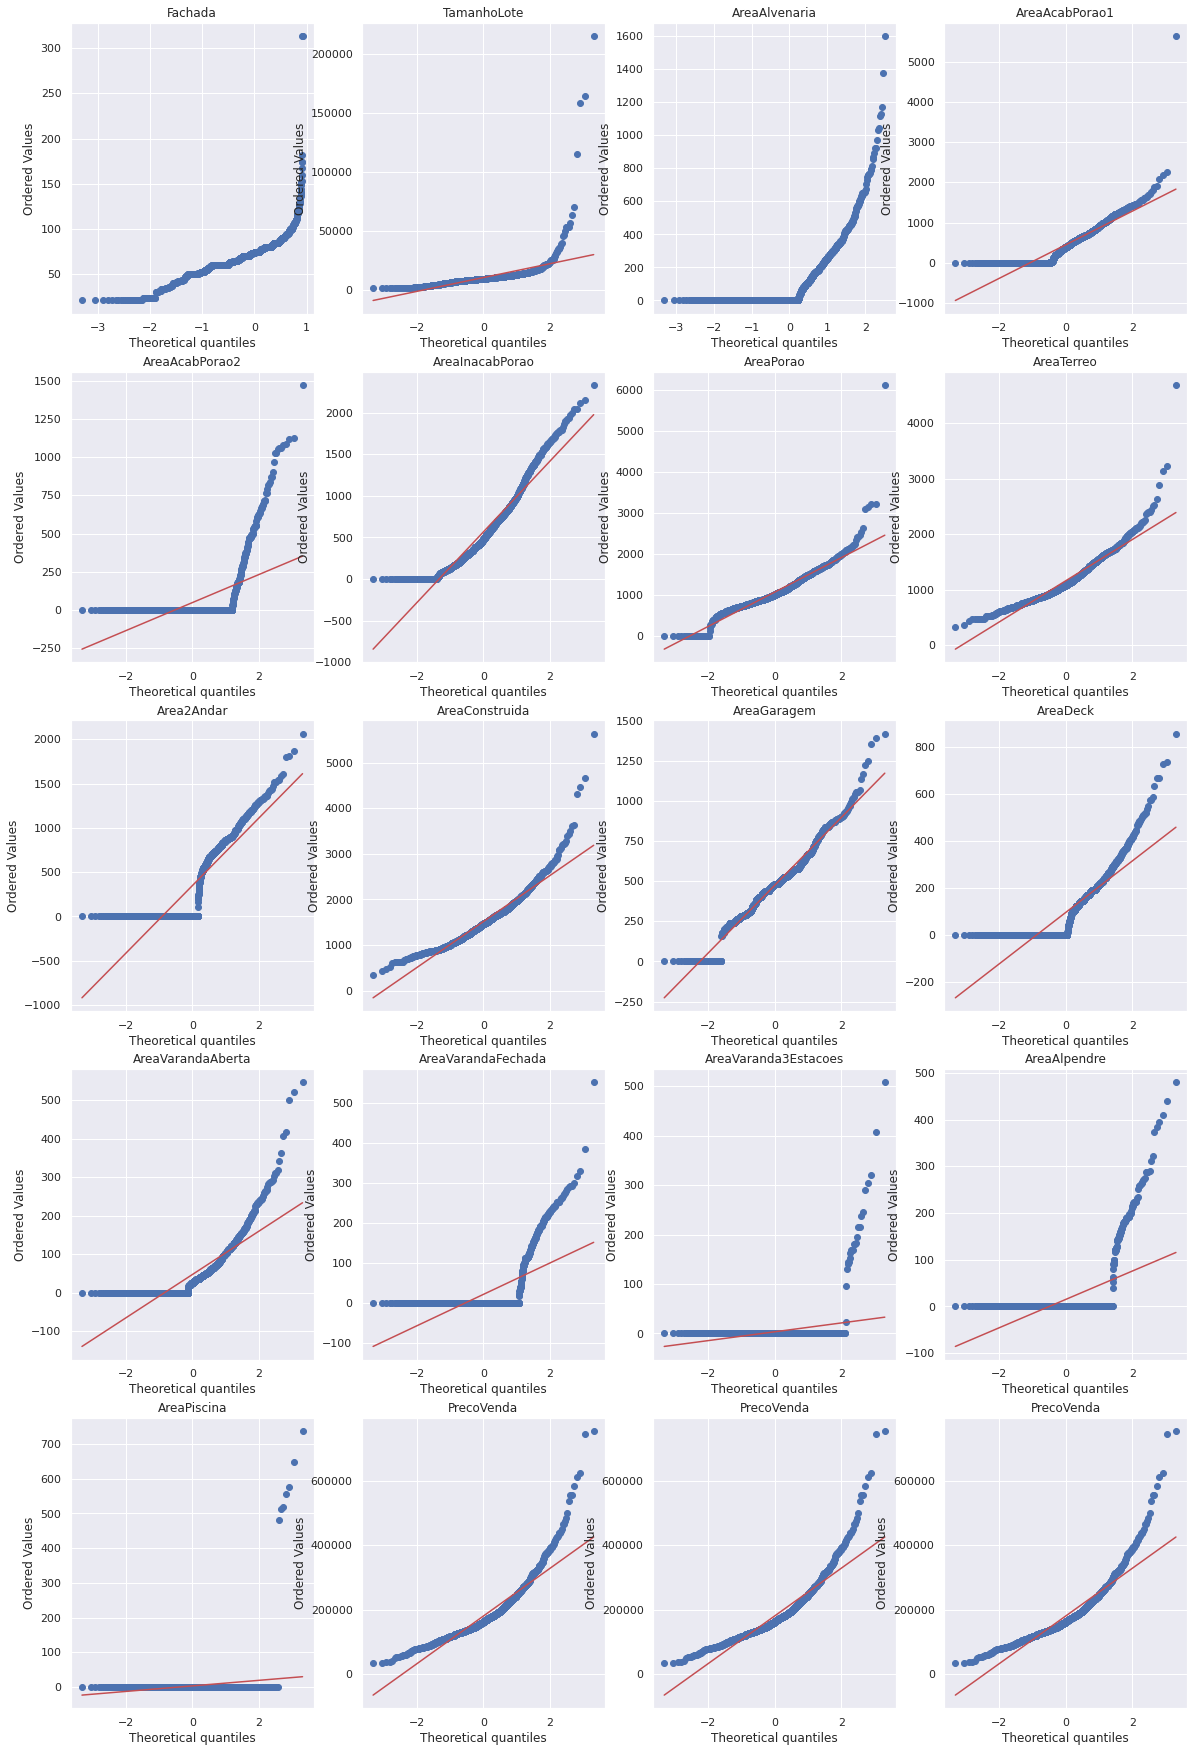

<Figure size 432x288 with 0 Axes>

In [65]:
from scipy import stats

sns.set(font_scale=1)
fig, eixo = plt.subplots(5,4,figsize=(20,31))

fig = plt.figure()

for i in range(5):
    # Para cada coluna
    for j in range(4):
        # Verifica se existe um nome de coluna na lista 'colunas_categoricas'
        if colunas_numericas[i][j] != '':
                       
            prob = stats.probplot(data[colunas_continuas[i][j]], dist=stats.norm, plot=eixo[i][j])
            eixo[i][j].set_title(f'{colunas_continuas[i][j]}')
                       
plt.show()

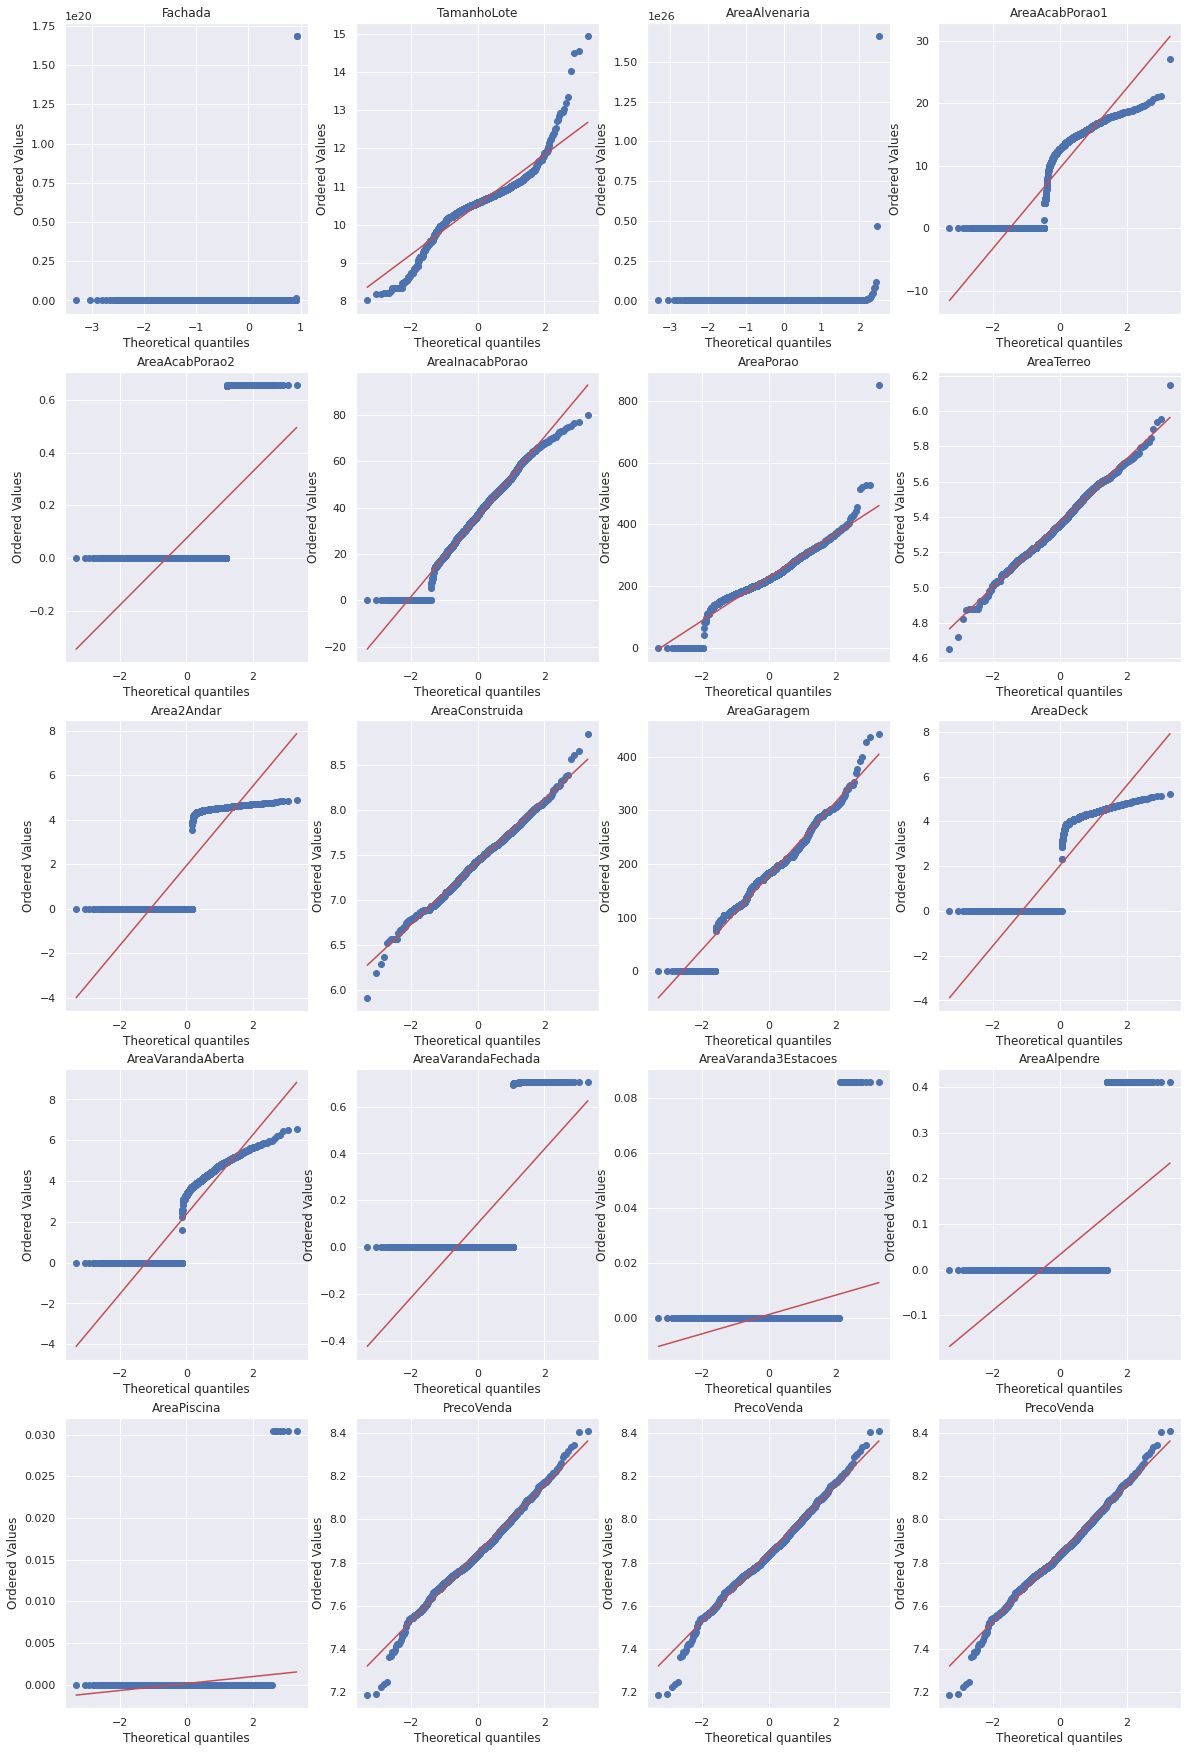

<Figure size 432x288 with 0 Axes>

In [67]:
from scipy import stats

from scipy.special import boxcox, inv_boxcox

fig, eixo = plt.subplots(5,4,figsize=(20,31))

fig = plt.figure()

lambda_coluna = {}

for i in range(5):
    # Para cada coluna
    for j in range(4):
        # Verifica se existe um nome de coluna na lista 'colunas_categoricas'
        if colunas_numericas[i][j] != '':                    
            
            
            xt, lam = stats.yeojohnson(data[colunas_continuas[i][j]])
            lambda_coluna[colunas_continuas[i][j]]= lam
            prob = stats.probplot(xt, dist=stats.norm, plot=eixo[i][j])
            eixo[i][j].set_title(f'{colunas_continuas[i][j]}')

plt.show()

In [68]:
lambda_coluna

{'Fachada': 8.472135811722177,
 'TamanhoLote': 0.03081854079393649,
 'AreaAlvenaria': 8.472135811722177,
 'AreaAcabPorao1': 0.22872562524018467,
 'AreaAcabPorao2': -1.5215505484996374,
 'AreaInacabPorao': 0.4712723599394073,
 'AreaPorao': 0.7396016878493652,
 'AreaTerreo': -0.07987709830415687,
 'Area2Andar': -0.12741730779016755,
 'AreaConstruida': 0.005539641278705955,
 'AreaGaragem': 0.8112580246118668,
 'AreaDeck': -0.078596115085857,
 'AreaVarandaAberta': 0.011642789763656977,
 'AreaVarandaFechada': -1.419949234340374,
 'AreaVaranda3Estacoes': -11.671535755645818,
 'AreaAlpendre': -2.4348601130422116,
 'AreaPiscina': -32.86118772770139,
 'PrecoVenda': -0.07693210208638519}

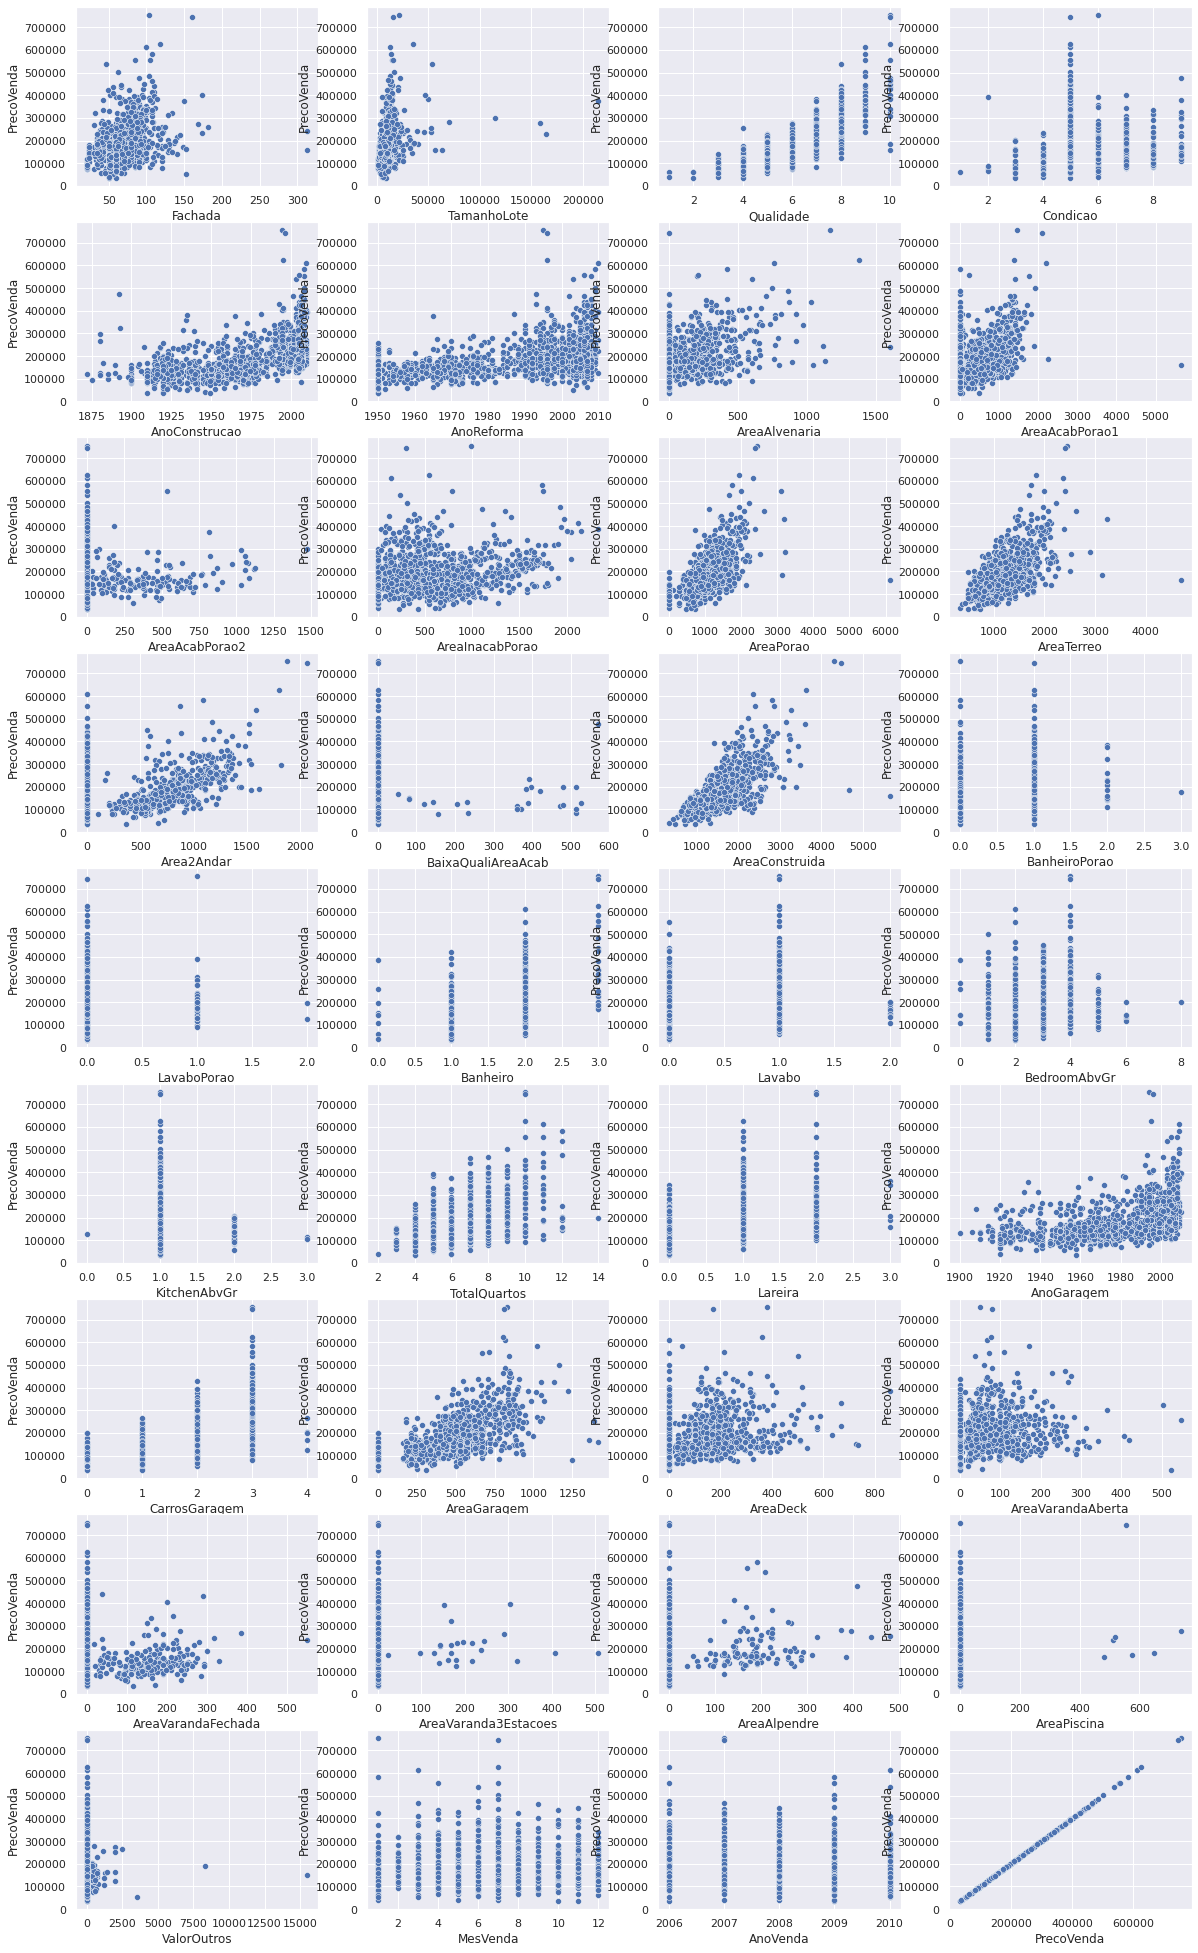

In [70]:
sns.set(font_scale=1)

fig, eixo = plt.subplots(9,4,figsize=(20,35)) 

# Para cada linha 
for i in range(9):
    # Para cada coluna
    for j in range(4):
        # Verifica se existe um nome de coluna na lista 'colunas_categoricas'
        if colunas_numericas[i][j] != '':
            # Se sim faz o plot do Boxplot naquela linha e coluna, indicando no eixo vertical/y sempre a variável 'PrecoVenda'
            sns.scatterplot(data=data, x=colunas_numericas[i][j], y="PrecoVenda",ax=eixo[i][j])

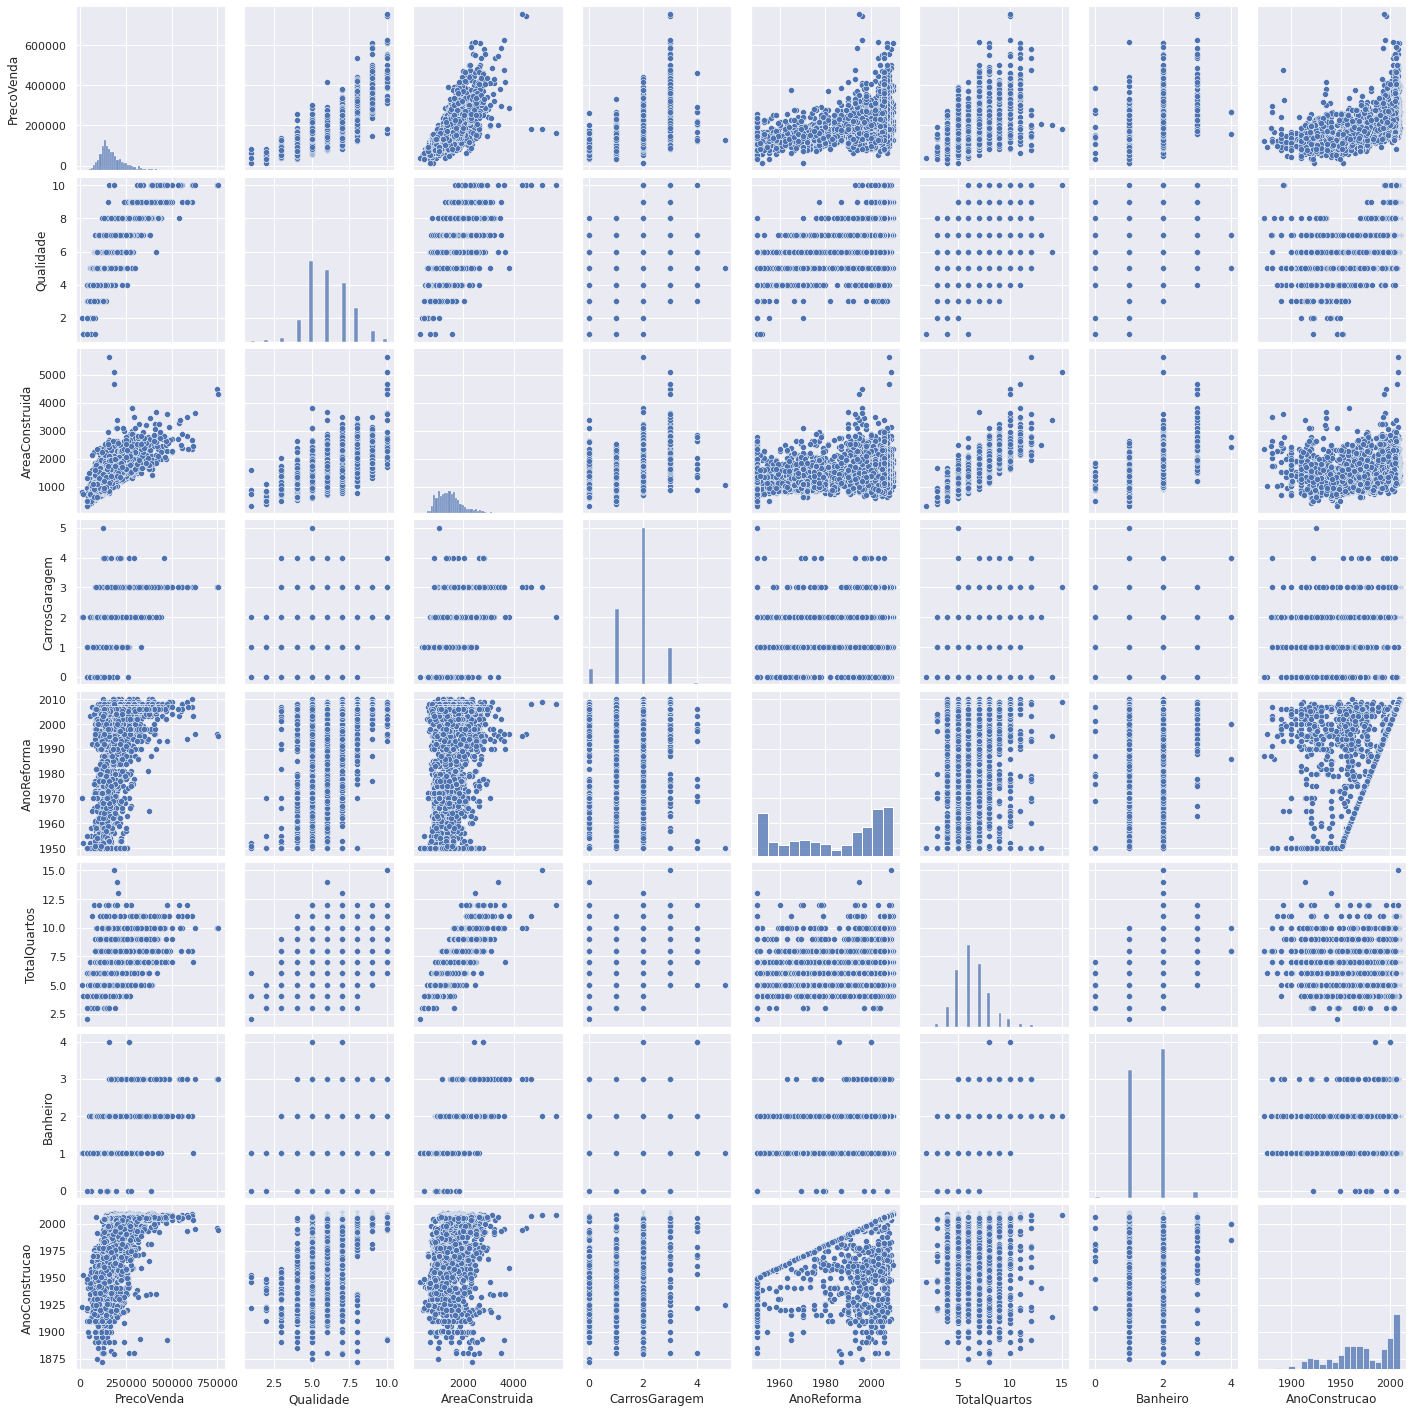

In [9]:
sns.set_context(font_scale=0.1)
sns.pairplot(data, # Dados para plotar
             vars=['PrecoVenda','Qualidade','AreaConstruida','CarrosGaragem','AnoReforma','TotalQuartos','Banheiro','AnoConstrucao'] # Variáveis a serem analisadas
            )
plt.show()

- Plotar a distribuição do valor de venda (histogramas ou boxplots) para as diferentes variáveis - categóricas

In [10]:
fig = px.box(data, x="Bairro", y="PrecoVenda")
fig.show()

In [11]:
colunas_categoricas = [['ClasseImovel','ClasseZona','Rua','Beco'],
                    ['FormaProp','PlanoProp','Servicos','ConfigLote'],
                    ['InclinacaoLote','Estrada1','Estrada2','TipoHabitacao'],
                    ['EstiloHabitacao','TipoTelhado','MaterialTelhado','Exterior1'],
                    ['Exterior2','TipoAlvenaria','QualidadeCobertura','CondicaoExterna'],
                    ['TipoFundacao','AlturaPorao','CondicaoPorao','ParedePorao'],
                    ['TipoAcabPorao1','TipoAcabPorao2','Aquecimento','QualidadeAquecimento'],
                    ['ArCentral','InstalacaoEletrica','QualidadeCozinha','Funcionalidade'],
                    ['QualdiadeLareira','LocalGaragem','AcabamentoGaragem','QualidadeGaragem'],
                    ['CondicaoGaragem','EntradaPavimentada','QualidadePiscina','QualidadeCerca'],
                    ['Outros','TipoVenda','CondicaoVenda','']]

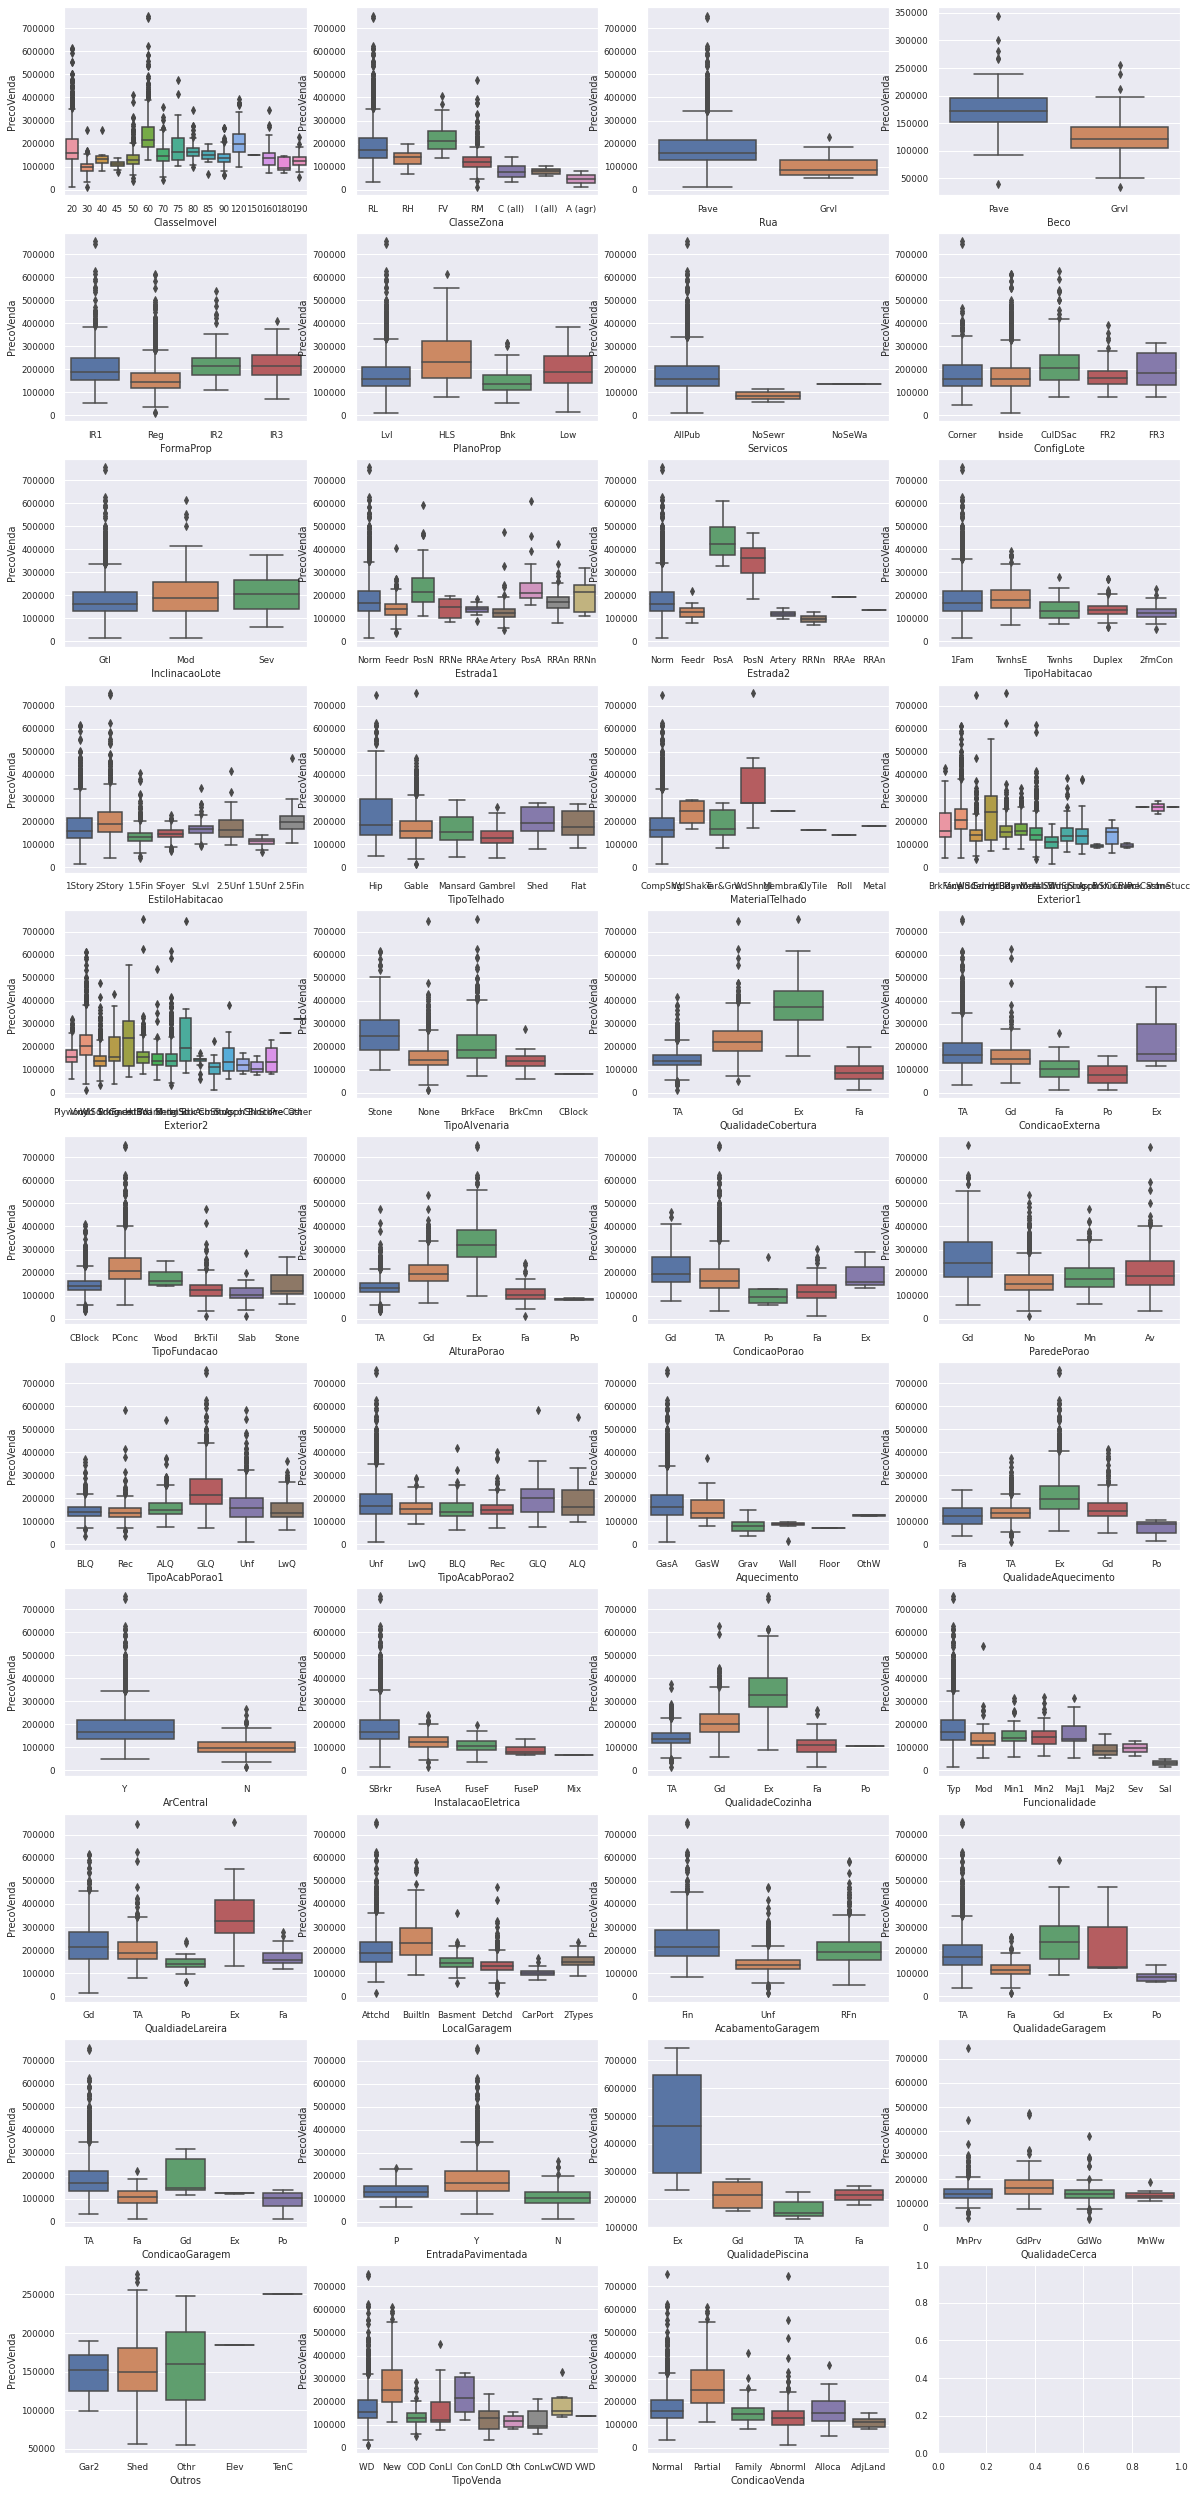

In [12]:
sns.set(font_scale=0.8)

fig, eixo = plt.subplots(11,4,figsize=(20,45)) 
# Para cada linha 
for linha in range(11):
    # Para cada coluna
    for coluna in range(4):
        # Verifica se existe um nome de coluna na lista 'colunas_categoricas'
        if colunas_categoricas[linha][coluna] != '':
            # Se sim faz o plot do Boxplot naquela linha e coluna, indicando no eixo vertical/y sempre a variável 'PrecoVenda'
            sns.boxplot(data=data,x=colunas_categoricas[linha][coluna],y='PrecoVenda',ax=eixo[linha][coluna],orient='v')

# Ao final, escreva um pouco sobre o que você conseguiu entender, extrapolar e interpretar a partir da análise exploratória #

#  Pré-Preprocessamento, limpeza dos dados, construção de features #

- Não remova linhas com valores faltantes, já que isso pode modificar a distribuição do dataset de validação

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2930 non-null   int64  
 1   PID                   2930 non-null   int64  
 2   ClasseImovel          2930 non-null   int64  
 3   ClasseZona            2930 non-null   object 
 4   Fachada               2440 non-null   float64
 5   TamanhoLote           2930 non-null   int64  
 6   Rua                   2930 non-null   object 
 7   Beco                  198 non-null    object 
 8   FormaProp             2930 non-null   object 
 9   PlanoProp             2930 non-null   object 
 10  Servicos              2930 non-null   object 
 11  ConfigLote            2930 non-null   object 
 12  InclinacaoLote        2930 non-null   object 
 13  Bairro                2930 non-null   object 
 14  Estrada1              2930 non-null   object 
 15  Estrada2             

In [14]:
columns_nan = data.columns[data.isna().any()].tolist()
data[columns_nan].isna().sum()

Fachada                490
Beco                  2732
TipoAlvenaria           23
AreaAlvenaria           23
AlturaPorao             80
CondicaoPorao           80
ParedePorao             83
TipoAcabPorao1          80
AreaAcabPorao1           1
TipoAcabPorao2          81
AreaAcabPorao2           1
AreaInacabPorao          1
AreaPorao                1
InstalacaoEletrica       1
BanheiroPorao            2
LavaboPorao              2
QualdiadeLareira      1422
LocalGaragem           157
AnoGaragem             159
AcabamentoGaragem      159
CarrosGaragem            1
AreaGaragem              1
QualidadeGaragem       159
CondicaoGaragem        159
QualidadePiscina      2917
QualidadeCerca        2358
Outros                2824
dtype: int64

- Tente criar features (Exemplo: dividir o número de quartos pela área, elevar a área ao quadrado)

# Objetivo 1: interpretabilidade usando uma regressão linear #

- Utilize apenas exemplos onde a variável SaleCondition é igual à Normal (isso ajuda a diminuir o ruído no dado e levar a uma melhor interpretação). Crie um novo dataset aplicando esse filtro (esse dataset será usado apenas nessa etapa)

- Constraints do modelo: essa regressão linear deve ter um R² mínimo de 0.85 e conter exatamente 6 features/variáveis. Todas as features devem ter um P-value maior do que 0.95 e não podem ser colineares. Não é necessário separar esse dataset em treino e teste, já que o foco nessa etapa é na interpretação dos coeficientes de uma regressão linear.

- Aplique uma transformação logarítmica na sua variável de interesse (**SalePrice**)

In [72]:
df = data[data['CondicaoVenda']=='Normal']

In [73]:
df = df.assign(log_PrecoVenda = lambda x: np.log(x.PrecoVenda))

- Selecione 6 features para o seu modelo: onde pelo menos uma das features é uma feature construída com os valores de área do imóvel

In [ ]:
sns.set(font_scale = 1.3) # Para aumentar o tamanho da fonte
coluna = "log_PrecoVenda" # Coluna a ser representada

fig = px.histogram(df, x=coluna)
fig.show()

- As outras features devem estar relacionadas ao estado de conservação da casa, suas amenidades ou instalações internas 

In [93]:
xt, lam = stats.yeojohnson(df['AreaConstruida'])
df = df.assign(yeojohnson_AreaConstruida = xt)

df = df.assign(log_AreaConstruida = lambda x: np.log(x.AreaConstruida))


In [94]:
sns.set(font_scale = 1.3) # Para aumentar o tamanho da fonte
coluna = "log_AreaConstruida" # Coluna a ser representada

fig = px.histogram(df, x=coluna)
fig.show()

- Trate os valores faltantes

- Aplique as transformações nas variáveis categóricas que você julgar necessárias (One hot encoding, ordinal encoding, etc…)

In [78]:
from sklearn.preprocessing import LabelEncoder

d_types = dict(data.dtypes)
for name , type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        df[name] = Le.fit_transform(df[name])

In [95]:
smf.ols('log_PrecoVenda ~ log_AreaConstruida', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_PrecoVenda   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     1469.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):          2.45e-210
Time:                        23:22:50   Log-Likelihood:                -18.139
No. Observations:                1198   AIC:                             40.28
Df Residuals:                    1196   BIC:                             50.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.0094      0.157     38.378      0.000       5.702       6.317
log_AreaConstruida     0.8264      0.022     38.330      0.000       0.784       0.869
==============================================================================
Omnibus:                       89.028   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.380
Skew:                          -0.561   Prob(JB):                     3.29e-31
Kurtosis:                       4.246   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
smf.ols('log_PrecoVenda ~ log_AreaConstruida/Fachada + Qualidade + Condicao + Lareira + AnoConstrucao' ,
 data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_PrecoVenda   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     988.1
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:22:55   Log-Likelihood:                 519.58
No. Observations:                 961   AIC:                            -1025.
Df Residuals:                     954   BIC:                            -991.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.7924      0.438     -1.811      0.070      -1.651       0.066
log_AreaConstruida             0.4274      0.020     21.778      0.000       0.389       0.466
log_AreaConstruida:Fachada     0.0003   2.87e-05      9.025      0.000       0.000       0.000
Qualidade                      0.0974      0.005     18.418      0.000       0.087       0.108
Condicao                       0.0636      0.005     13.827      0.000       0.055       0.073
Lareira                        0.0660      0.008      7.922      0.000       0.050       0.082
AnoConstrucao                  0.0044      0.000     21.721      0.000       0.004       0.005
==============================================================================
Omnibus:                       68.951   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.049
Skew:                          -0.379   Prob(JB):                     2.17e-39
Kurtosis:                       4.968   Cond. No.                     1.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Utilize a lib statsmodel para fitar a regressão linear; use a função summary para conseguir interpretar os coeficientes

- Importante lembrar que a interpretação do coeficiente muda ao aplicar uma transformação lograritmica (ver mais aqui: http://www.cazaar.com/ta/econ113/interpreting-beta, ou aqui: https://kenbenoit.net/assets/courses/ME104/logmodels2.pdf)

4.167848685794663

- Verifique a distribuição dos resíduos da regressão linear, e quais as implicações do resultado obtido

- Reporte o R² dessa regressão, e a sua interpretação desse resultado

- As features não podem ter alta correlação (utilizar o EDA feito previamente para encontrar as features que você julgue relevantes)

- Verifique se os pressupostos da regressão linear estão sendo atendidos (dicas: [aqui](https://lamfo-unb.github.io/2019/04/13/Diagnostico-em-Regressao/) ou [aqui](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression4.html))

- Em um breve sumário, discorra sobre a interpretação dos coeficientes obtidos pela regressão linear (sobre interpretação ver [aqui](https://christophm.github.io/interpretable-ml-book/limo.html#interpretation))